In [1]:
#Importing necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
path= 'C:\\Users\\Downloads\\C5 Input for participants'  #assigning file path to path variable

In [3]:
domestic_files = [file for file in os.listdir(path+'\\'+'domestic_visitors') if not file.startswith(".")]
#grabbing all file names from domestic visitors folder

In [4]:
domestic_df= pd.DataFrame() #creating an empty dataframe
for file in domestic_files:
    current_df = pd.read_csv(path+'\\'+'domestic_visitors'+'\\'+ file) #reading each file
    domestic_df= pd.concat([domestic_df,current_df]) #concatenating each domestic visitor file for year 2016-2019 to the dataframe

In [5]:
domestic_df.insert(loc=5, column='visitor_type', value= 'Domestic')
#Inserting a new column to differntiate between domestic and foreign visitor

In [6]:
domestic_df.head(5)

,district,date,month,year,visitors,visitor_type
0,Adilabad,01-01-2016,January,2016,792136,Domestic
1,Adilabad,01-02-2016,February,2016,937820,Domestic
2,Adilabad,01-03-2016,March,2016,582946,Domestic
3,Adilabad,01-04-2016,April,2016,341948,Domestic
4,Adilabad,01-05-2016,May,2016,252887,Domestic


In [7]:
foreign_files = [file for file in os.listdir(path+'\\'+'foreign_visitors') if not file.startswith(".")] 
#repeating the same process for foreign visitor folder

In [8]:
foreign_df= pd.DataFrame() #creating an empty dataframe
for file in foreign_files:
    current_file= pd.read_csv(path+'\\'+'foreign_visitors'+'\\'+file) #reading each file
    foreign_df = pd.concat([foreign_df,current_file]) #concatenating each foreign visitor file for year 2016-2019 to the dataframe

In [9]:
foreign_df.insert(loc=5, column= 'visitor_type', value='Foreign')
#Inserting a new column to differntiate between domestic and foreign visitor

In [10]:
foreign_df.head(5)

,district,date,month,year,visitors,visitor_type
0,Adilabad,01-01-2016,January,2016,2,Foreign
1,Adilabad,01-02-2016,February,2016,0,Foreign
2,Adilabad,01-03-2016,March,2016,2,Foreign
3,Adilabad,01-04-2016,April,2016,0,Foreign
4,Adilabad,01-05-2016,May,2016,0,Foreign


In [11]:
all_data= pd.concat([domestic_df, foreign_df]) #joining both the domestic visitor dataframe and foreign visitor dataframe

In [12]:
all_data.tail(5) #checking the last 5 values

,district,date,month,year,visitors,visitor_type
391,Yadadri Bhongir,01-08-2019,August,2019,0,Foreign
392,Yadadri Bhongir,01-09-2019,September,2019,0,Foreign
393,Yadadri Bhongir,01-10-2019,October,2019,0,Foreign
394,Yadadri Bhongir,01-11-2019,November,2019,0,Foreign
395,Yadadri Bhongir,01-12-2019,December,2019,0,Foreign


In [13]:
all_data['date']= pd.to_datetime(all_data["date"],format="%d-%m-%Y") 
#changing the format of date column to dd-mm-yyyy

In [14]:
all_data.head(5)

,district,date,month,year,visitors,visitor_type
0,Adilabad,2016-01-01,January,2016,792136,Domestic
1,Adilabad,2016-02-01,February,2016,937820,Domestic
2,Adilabad,2016-03-01,March,2016,582946,Domestic
3,Adilabad,2016-04-01,April,2016,341948,Domestic
4,Adilabad,2016-05-01,May,2016,252887,Domestic


In [15]:
all_data.info() #checking d-types

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      3024 non-null   object        
 1   date          3024 non-null   datetime64[ns]
 2   month         3024 non-null   object        
 3   year          3024 non-null   int64         
 4   visitors      2994 non-null   object        
 5   visitor_type  3024 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 165.4+ KB


In [16]:
len(all_data[all_data['visitors'].isna() == True]) #checking for null values

30

In [17]:
all_data['visitors']= all_data['visitors'].str.strip() #removing leading and trailing whitespace from visitor column

In [18]:
all_data['district']= all_data['district'].str.strip() #removing leading and trailing whitespace from district column

In [19]:
len(all_data[all_data['visitors'].isna() == True]) #checking for null values

30

In [20]:
all_data['visitors']= all_data['visitors'].fillna(value=0) #removing all null values in visitor column and replacing it by 0

In [21]:
len(all_data[all_data['visitors'].isna() == True]) #checking for null values

0

In [22]:
all_data.info() #we have 3024 non null values in each column

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3024 entries, 0 to 395
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   district      3024 non-null   object        
 1   date          3024 non-null   datetime64[ns]
 2   month         3024 non-null   object        
 3   year          3024 non-null   int64         
 4   visitors      3024 non-null   object        
 5   visitor_type  3024 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 165.4+ KB


In [23]:
all_data['visitors']= all_data['visitors'].replace('',value=0) #removing empty strings in visitors column

In [24]:
all_data['district'] = all_data['district'].replace("Warangal (Urban)", value= 'Hanamkonda') 
#changing warangal (urban) name to hanamkonda
#link to article: "https://www.newindianexpress.com/states/telangana/2021/jun/21/warangal-urban-districts-name-to-be-changed-to-hanamkonda-announces-telangana-cm-kcr-2319428.html"

In [25]:
all_data['district'] = all_data['district'].replace("Warangal (Rural)", value= 'Warangal')
#changing warangal (rural) name to warangal

In [26]:
#all_data.to_csv("All_visitor_data.csv", index= False, encoding='utf-8-sig')
#saving it as a new .csv file(command has been commented out in order to prevent overwriting the original file)

In [27]:
all_data.head()

,district,date,month,year,visitors,visitor_type
0,Adilabad,2016-01-01,January,2016,792136,Domestic
1,Adilabad,2016-02-01,February,2016,937820,Domestic
2,Adilabad,2016-03-01,March,2016,582946,Domestic
3,Adilabad,2016-04-01,April,2016,341948,Domestic
4,Adilabad,2016-05-01,May,2016,252887,Domestic


# Time Series Forecasting (Predicting Foreign and Domestic visitors in Hyderabad for 2025)

* Foreasting Foreign Visitors for Hyderabad for 2025

In [28]:
#importing required libraries
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima.arima.utils import ndiffs
from pmdarima.arima.utils import nsdiffs


from sklearn.metrics import mean_squared_error
from tqdm import tqdm_notebook
from itertools import product

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [29]:
all_data= pd.read_csv("All_visitor_data.csv") #reading csv file containing all data

In [30]:
all_data.head()

,district,date,month,year,visitors,visitor_type
0,Adilabad,2016-01-01,January,2016,792136,Domestic
1,Adilabad,2016-02-01,February,2016,937820,Domestic
2,Adilabad,2016-03-01,March,2016,582946,Domestic
3,Adilabad,2016-04-01,April,2016,341948,Domestic
4,Adilabad,2016-05-01,May,2016,252887,Domestic


In [31]:
foreign_df= all_data[(all_data["district"] == "Hyderabad") & (all_data["visitor_type"]== "Foreign")] 
#filtering out foreign visitors for hyderabad

In [32]:
foreign_df.head()

,district,date,month,year,visitors,visitor_type
1536,Hyderabad,2016-01-01,January,2016,15865,Foreign
1537,Hyderabad,2016-02-01,February,2016,29646,Foreign
1538,Hyderabad,2016-03-01,March,2016,13019,Foreign
1539,Hyderabad,2016-04-01,April,2016,8402,Foreign
1540,Hyderabad,2016-05-01,May,2016,8522,Foreign


In [33]:
foreign_df= foreign_df.drop(["district","month","year","visitor_type"], axis=1)
#keeping columns that are needed for time series forecasting
pd.to_datetime(foreign_df["date"],format= "%Y-%m-%d")
#changing d-type of date column

1536   2016-01-01
1537   2016-02-01
1538   2016-03-01
1539   2016-04-01
1540   2016-05-01
1541   2016-06-01
1542   2016-07-01
1543   2016-08-01
1544   2016-09-01
1545   2016-10-01
1546   2016-11-01
1547   2016-12-01
1908   2017-01-01
1909   2017-02-01
1910   2017-03-01
1911   2017-04-01
1912   2017-05-01
1913   2017-06-01
1914   2017-07-01
1915   2017-08-01
1916   2017-09-01
1917   2017-10-01
1918   2017-11-01
1919   2017-12-01
2280   2018-01-01
2281   2018-02-01
2282   2018-03-01
2283   2018-04-01
2284   2018-05-01
2285   2018-06-01
2286   2018-07-01
2287   2018-08-01
2288   2018-09-01
2289   2018-10-01
2290   2018-11-01
2291   2018-12-01
2652   2019-01-01
2653   2019-02-01
2654   2019-03-01
2655   2019-04-01
2656   2019-05-01
2657   2019-06-01
2658   2019-07-01
2659   2019-08-01
2660   2019-09-01
2661   2019-10-01
2662   2019-11-01
2663   2019-12-01
Name: date, dtype: datetime64[ns]

In [34]:
foreign_df.sort_values(by='date', ascending= True, inplace= True) #sorting dataframe by date
foreign_df.set_index('date',inplace= True) #setting date column as index
foreign_df.index = pd.to_datetime(foreign_df.index) #converting index to datetime d-type
foreign_df= foreign_df.asfreq("MS") #setting frequency to MS: Month Start

In [35]:
foreign_df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [36]:
foreign_df.head()

,visitors
date,
2016-01-01,15865
2016-02-01,29646
2016-03-01,13019
2016-04-01,8402
2016-05-01,8522


In [37]:
plt.rcParams["figure.figsize"] = [10, 7.5]
#dynamically changing the default rc (runtime configuration) settings for matplotlib

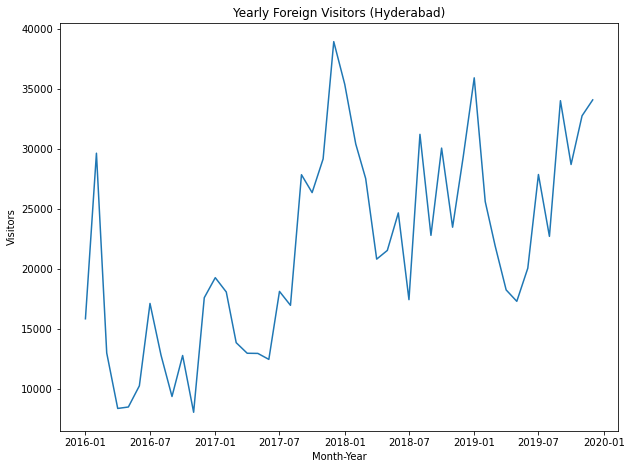

In [38]:
plt.plot(foreign_df.index, foreign_df["visitors"])
plt.title("Yearly Foreign Visitors (Hyderabad)")
plt.ylabel("Visitors")
plt.xlabel("Month-Year")
plt.show()

<Figure size 720x540 with 0 Axes>

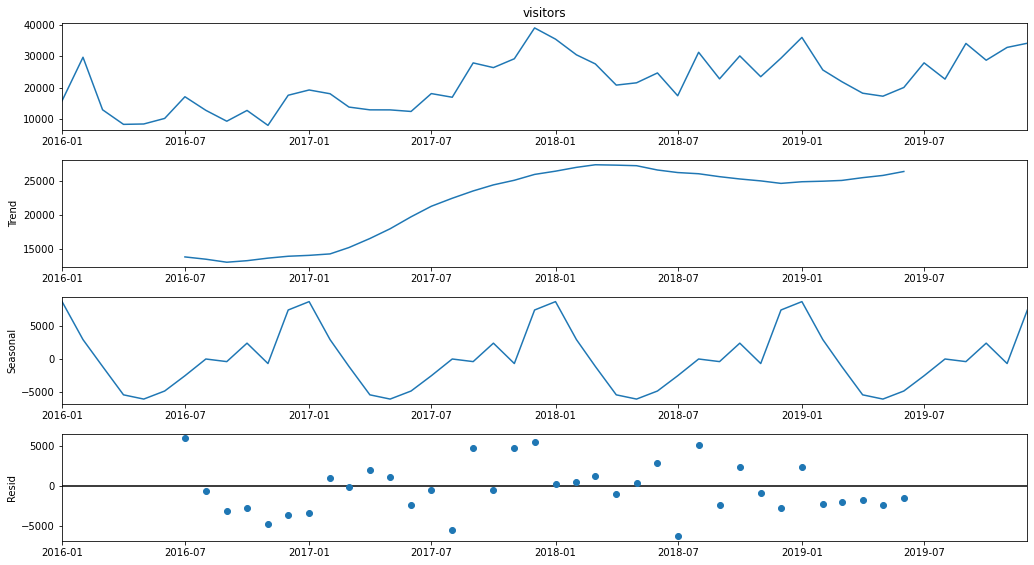

In [39]:
decomposition = seasonal_decompose(foreign_df["visitors"],model='additive')
#decomposing time series to find trend and seasonality
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [40]:
#We see a rising trend hence visually it seems non-stationary.
#let us confirm non-stationarity using two statistical tests (KPSS & AD Fuller).

In [41]:
def check_kpss(time_series, c): #creating function to check stationarity
    '''In econometrics, Kwiatkowski–Phillips–Schmidt–Shin (KPSS) test 
    is used for testing a null hypothesis that an observable 
    time series is stationary around a deterministic trend (i.e. trend-stationary)
    against the alternative of a unit root.
    Null hypothesis: Series is stationary
    ALternate hypothesis: Series is not stationary'''

    stats,p, lags, critical_values= kpss(time_series, c)
    print(f"Test Statistic: {stats}")
    print(f"p-value: {p}")
    print(f"Lags: {lags}")
    print(f"Critical Values: {critical_values}")
    if p < 0.05:
        print("Time series is non-stationary: We reject null hypothesis")
    else:
        print("Time series is stationary: We fail to reject null hypothesis")    

In [42]:
check_kpss(foreign_df["visitors"],"ct")

Test Statistic: 0.09089209140304354
p-value: 0.1
Lags: 3
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Time series is stationary: We fail to reject null hypothesis


In [43]:
def check_adf(time_series): #creating function to check stationarity
    '''augmented Dickey–Fuller test (ADF) tests the null hypothesis that a unit root is present in a time series sample.
    The alternative hypothesis is different depending on which version of the test is used,
    but is usually stationarity or trend-stationarity. It is an augmented version of the Dickey–Fuller test for a larger
    and more complicated set of time series models.The augmented Dickey–Fuller (ADF) statistic,
    used in the test, is a negative number. The more negative it is,
    the stronger the rejection of the hypothesis that there is a unit root at some level of confidence.
    Null hypothesis: Series is not stationary
    ALternate hypothesis: Series is stationary'''
    test_result = adfuller(time_series)
    print ('ADF Test:')
    labels = ['ADF Statistic','p-value','No. of Lags Used','Number of Observations Used']
    for value,label in zip(test_result,labels):
        print (label +': '+ str(value))
    if test_result [1] <= 0.05:
        print ("Reject Null hypothesis: Series is stationary")
    else:
        print ("fail to reject Null hypothesis: Series is non-stationary")

In [44]:
check_adf(foreign_df["visitors"])

ADF Test:
ADF Statistic: -1.5933559374940758
p-value: 0.4869301842113012
No. of Lags Used: 1
Number of Observations Used: 46
fail to reject Null hypothesis: Series is non-stationary


In [45]:
#KPSS test stated stationarity but ADF test confirmed presence of unit root so we can conclude that series is not stationary.
#Hence we will do differencing to make it stationary

In [46]:
foreign_df["first_diff"]= foreign_df["visitors"].diff(1)
foreign_df.head() 
#Taking the first difference between consecutive observations(i.e. lag 1 difference), this is done in order to remove trend

,visitors,first_diff
date,,
2016-01-01,15865,NaN
2016-02-01,29646,13781.0
2016-03-01,13019,-16627.0
2016-04-01,8402,-4617.0
2016-05-01,8522,120.0


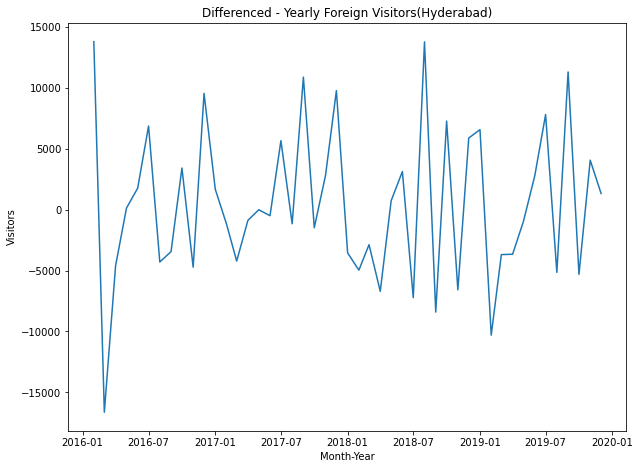

In [47]:
plt.plot(foreign_df["first_diff"][1:]) #plotting the first transformation
plt.title("Differenced - Yearly Foreign Visitors(Hyderabad)")
plt.ylabel("Visitors")
plt.xlabel("Month-Year")
plt.show()

In [48]:
#Trend has been removed by first difference

In [49]:
foreign_df["seasonal_diff"]= foreign_df["first_diff"][1:].diff(12)
foreign_df.head(15)
#Taking the first seasonal difference, this is done in order to remove seasonality from time series

,visitors,first_diff,seasonal_diff
date,,,
2016-01-01,15865,NaN,NaN
2016-02-01,29646,13781.0,NaN
2016-03-01,13019,-16627.0,NaN
2016-04-01,8402,-4617.0,NaN
2016-05-01,8522,120.0,NaN
2016-06-01,10284,1762.0,NaN
2016-07-01,17142,6858.0,NaN
2016-08-01,12842,-4300.0,NaN
2016-09-01,9397,-3445.0,NaN


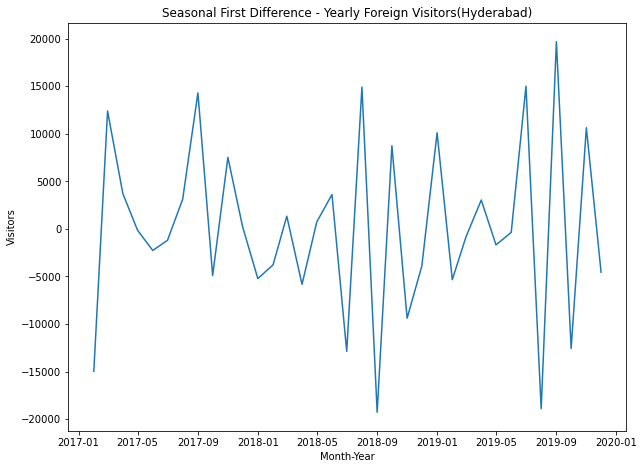

In [50]:
plt.plot(foreign_df["seasonal_diff"][13:]) #plotting the first transformation
plt.title("Seasonal First Difference - Yearly Foreign Visitors(Hyderabad)")
plt.ylabel("Visitors")
plt.xlabel("Month-Year")
plt.show()

In [51]:
#we see a much more stable variance. We will use AD Fuller(Augmented Dickey–Fuller test) test to confirm stationarity

In [52]:
#checking for stationarity for the seasonal first difference values
check_adf(foreign_df["seasonal_diff"][13:])

ADF Test:
ADF Statistic: -3.0335118727881305
p-value: 0.03188113158029416
No. of Lags Used: 2
Number of Observations Used: 32
Reject Null hypothesis: Series is stationary


In [53]:
#ADF Statistic is negative and the p-value is less than 0.05,
#hence we confirm that time series is stationary

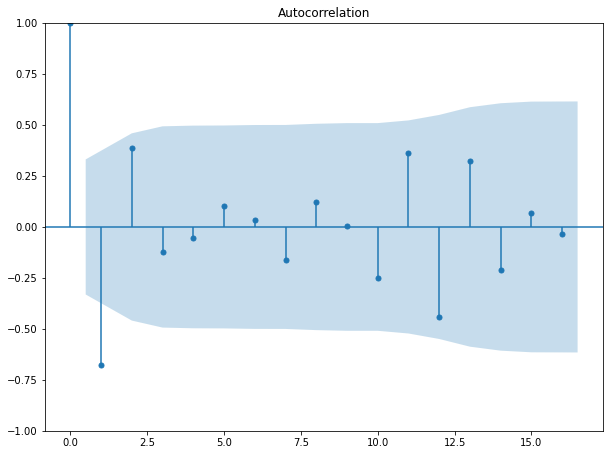

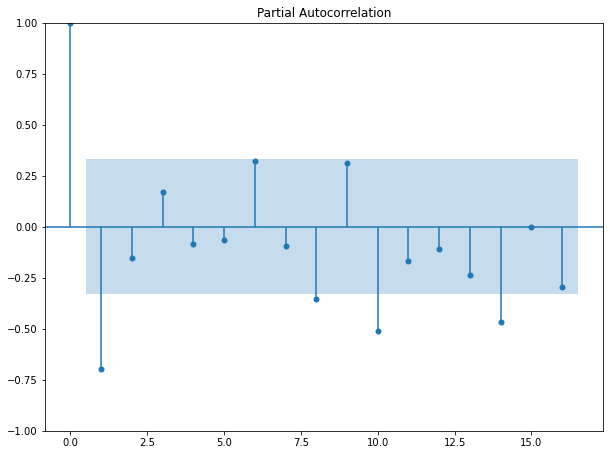

In [54]:
#plotting the acf and pacf to see if we can derive an order
plot_acf(foreign_df["seasonal_diff"][13:]);
plot_pacf(foreign_df["seasonal_diff"][13:]);

In [55]:
#pacf plot is sinusoidal so we cannot derive anything from the plot,
#so we will create a function to 
#find the optimal SARIMA model hyperparameters for the time series

In [56]:
def optimize_SARIMA(endog, parameters_list, d, D, s):
    """
        Return dataframe with parameters, corresponding AIC and SSE
        
        parameters_list - list with (p, q, P, Q) tuples
        d - integration order
        D - seasonal integration order
        s - length of season
        endog - the observed variable
    """
    
    results = []

    
    for param in tqdm_notebook(parameters_list):
        try: 
            model = SARIMAX(endog, order=(param[0], d, param[1]), seasonal_order=(param[2], D, param[3], s),
                            simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([param, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)x(P,Q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [57]:
p = range(0, 4, 1)

q = range(0, 4, 1)
P = range(0, 4, 1)

Q = range(0, 4, 1)
s = 12

parameters = product(p, q, P, Q)
parameters_list = list(parameters)

print(len(parameters_list))
print(parameters_list[:5])

256
[(0, 0, 0, 0), (0, 0, 0, 1), (0, 0, 0, 2), (0, 0, 0, 3), (0, 0, 1, 0)]


In [58]:
result_df = optimize_SARIMA(foreign_df["visitors"], parameters_list, 1, 1, s)
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(1, 0, 0, 1)",713.718157
1,"(0, 2, 0, 1)",714.043130
2,"(0, 1, 0, 1)",714.528027
3,"(1, 2, 0, 1)",715.286454
4,"(1, 1, 0, 1)",715.431388
...,...,...
251,"(0, 3, 1, 1)",741.043562
252,"(0, 3, 3, 2)",741.056577
253,"(0, 3, 3, 3)",741.368264
254,"(3, 3, 0, 0)",742.109529


In [59]:
#lowest AIC is achieved by p=1, q=0, P=0, Q=1 hence we will use these parameters

In [60]:
best_model_foreign= SARIMAX(foreign_df["visitors"], order= (1,1,0), seasonal_order=(0,1,1,12), simple_differencing=False)
result_foreign= best_model_foreign.fit(disp=False)
result_foreign.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             visitors   No. Observations:                   48
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                -353.859
Date:                              Wed, 10 May 2023   AIC                            713.718
Time:                                      21:46:52   BIC                            718.384
Sample:                                  01-01-2016   HQIC                           715.329
                                       - 12-01-2019                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5564      0.205     -2.709      0.007      -0.959      -0.154
ma.S.L12      -0.6830      0.280     -2.440      0.015      -1.232      -0.134
sigma2      4.281e+07   1.84e-09   2.33e+16      0.000    4.28e+07    4.28e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 0.24
Prob(Q):                              0.72   Prob(JB):                         0.89
Heteroskedasticity (H):               0.59   Skew:                            -0.18
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.19e+32. Standard errors may be unstable.
"""

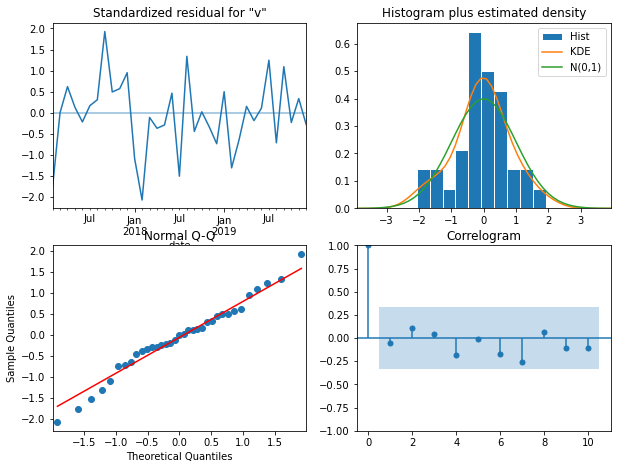

In [61]:
result_foreign.plot_diagnostics(); #checking the residuals of our model

In [62]:
#we see a fairly normal distribution with slight deviations(QQ Plot) at extremes
#and no significance after lag 0 (Correlogram), hence we conclude that residuals are normal

In [63]:
yhat_foreign= result_foreign.predict()

In [64]:
yhat_foreign.mean()

21691.883308929988

In [65]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse= sqrt(mean_squared_error(foreign_df["visitors"][1:],yhat_foreign[1:]))
print(rmse) #root mean squared error

6705.195269718002


In [66]:
# Let us forecast foreign visitors
predict_foreign = result_foreign.forecast(72)

In [67]:
predict_foreign

2020-01-01    40957.765106
2020-02-01    36268.226867
2020-03-01    32289.708288
2020-04-01    28133.741299
2020-05-01    28293.478645
                  ...     
2025-08-01    64603.379016
2025-09-01    67779.633339
2025-10-01    68016.058048
2025-11-01    67508.326378
2025-12-01    72624.258573
Freq: MS, Name: predicted_mean, Length: 72, dtype: float64

In [68]:
predict_foreign= predict_foreign.round().astype("int").to_frame(name= "visitors")

In [69]:
predict_foreign.head()

,visitors
2020-01-01,40958
2020-02-01,36268
2020-03-01,32290
2020-04-01,28134
2020-05-01,28293


In [70]:
foreign_visitor_2025= predict_foreign[-12:].round().astype("int")

In [71]:
foreign_visitor_2025.sum()

visitors    785723
dtype: int64

In [72]:
foreign_df= foreign_df.drop(["first_diff", "seasonal_diff"],axis = 1) #dropping columns which are not needed

In [73]:
all_foreign_df= pd.concat([foreign_df,predict_foreign])

In [74]:
all_foreign_df.tail(5)

,visitors
2025-08-01,64603
2025-09-01,67780
2025-10-01,68016
2025-11-01,67508
2025-12-01,72624


In [75]:
#all_foreign_df.to_csv("Foreign_visitor_prediction.csv")

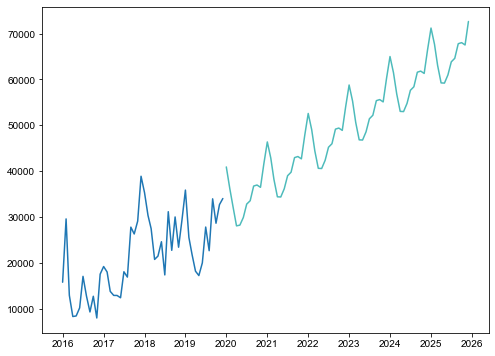

In [76]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.plot(all_foreign_df[:-72])
plt.plot(all_foreign_df[-72:],color='#4DBBBB')

* Foreasting Domestic Visitors for Hyderabad for 2025 

In [77]:
all_data= pd.read_csv("All_visitor_data.csv") #reading csv file containing all data
all_data.head()

,district,date,month,year,visitors,visitor_type
0,Adilabad,2016-01-01,January,2016,792136,Domestic
1,Adilabad,2016-02-01,February,2016,937820,Domestic
2,Adilabad,2016-03-01,March,2016,582946,Domestic
3,Adilabad,2016-04-01,April,2016,341948,Domestic
4,Adilabad,2016-05-01,May,2016,252887,Domestic


In [78]:
domestic_df= all_data[(all_data["district"] == "Hyderabad") & (all_data["visitor_type"]== "Domestic")] 
#filtering out domestic visitors for hyderabad
domestic_df.head()

,district,date,month,year,visitors,visitor_type
24,Hyderabad,2016-01-01,January,2016,1122510,Domestic
25,Hyderabad,2016-02-01,February,2016,778748,Domestic
26,Hyderabad,2016-03-01,March,2016,1017794,Domestic
27,Hyderabad,2016-04-01,April,2016,1127738,Domestic
28,Hyderabad,2016-05-01,May,2016,1287181,Domestic


In [79]:
domestic_df= domestic_df.drop(["district","month","year","visitor_type"], axis=1)
#keeping columns that are needed for time series forecasting
pd.to_datetime(domestic_df["date"],format= "%Y-%m-%d")
#changing d-type of date column

24     2016-01-01
25     2016-02-01
26     2016-03-01
27     2016-04-01
28     2016-05-01
29     2016-06-01
30     2016-07-01
31     2016-08-01
32     2016-09-01
33     2016-10-01
34     2016-11-01
35     2016-12-01
396    2017-01-01
397    2017-02-01
398    2017-03-01
399    2017-04-01
400    2017-05-01
401    2017-06-01
402    2017-07-01
403    2017-08-01
404    2017-09-01
405    2017-10-01
406    2017-11-01
407    2017-12-01
768    2018-01-01
769    2018-02-01
770    2018-03-01
771    2018-04-01
772    2018-05-01
773    2018-06-01
774    2018-07-01
775    2018-08-01
776    2018-09-01
777    2018-10-01
778    2018-11-01
779    2018-12-01
1140   2019-01-01
1141   2019-02-01
1142   2019-03-01
1143   2019-04-01
1144   2019-05-01
1145   2019-06-01
1146   2019-07-01
1147   2019-08-01
1148   2019-09-01
1149   2019-10-01
1150   2019-11-01
1151   2019-12-01
Name: date, dtype: datetime64[ns]

In [80]:
domestic_df.sort_values(by='date', ascending= True, inplace= True) #sorting dataframe by date
domestic_df.set_index('date',inplace= True) #setting date column as index
domestic_df.index = pd.to_datetime(domestic_df.index) #converting index to datetime d-type
domestic_df= domestic_df.asfreq("MS") #setting frequency to MS: Month Start

In [81]:
domestic_df.index

DatetimeIndex(['2016-01-01', '2016-02-01', '2016-03-01', '2016-04-01',
               '2016-05-01', '2016-06-01', '2016-07-01', '2016-08-01',
               '2016-09-01', '2016-10-01', '2016-11-01', '2016-12-01',
               '2017-01-01', '2017-02-01', '2017-03-01', '2017-04-01',
               '2017-05-01', '2017-06-01', '2017-07-01', '2017-08-01',
               '2017-09-01', '2017-10-01', '2017-11-01', '2017-12-01',
               '2018-01-01', '2018-02-01', '2018-03-01', '2018-04-01',
               '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01',
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01', '2019-07-01', '2019-08-01',
               '2019-09-01', '2019-10-01', '2019-11-01', '2019-12-01'],
              dtype='datetime64[ns]', name='date', freq='MS')

In [82]:
domestic_df.head()

,visitors
date,
2016-01-01,1122510
2016-02-01,778748
2016-03-01,1017794
2016-04-01,1127738
2016-05-01,1287181


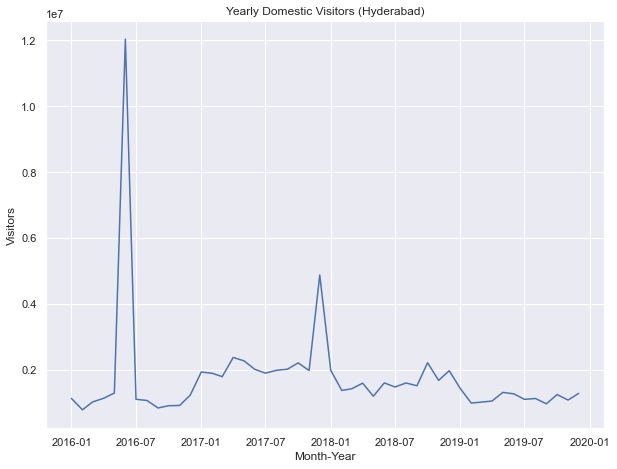

In [83]:
plt.plot(domestic_df.index, domestic_df["visitors"])
plt.title("Yearly Domestic Visitors (Hyderabad)")
plt.ylabel("Visitors")
plt.xlabel("Month-Year")
plt.show()

<Figure size 720x540 with 0 Axes>

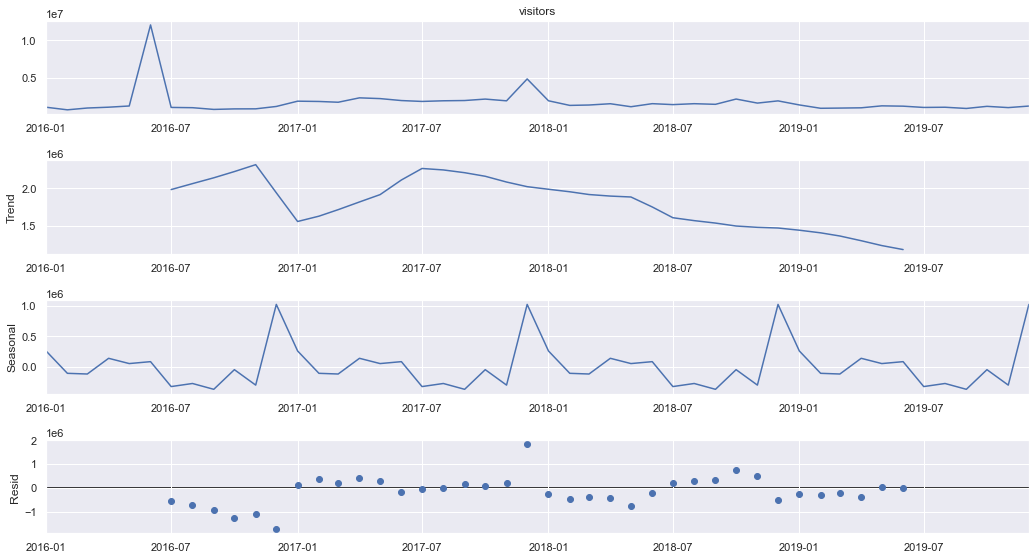

In [84]:
decomposition = seasonal_decompose(domestic_df["visitors"],model='additive')
#decomposing time series to find trend and seasonality
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [85]:
#let us confirm non-stationarity using two statistical tests (KPSS & AD Fuller).

In [86]:
check_kpss(domestic_df["visitors"],"ct")

Test Statistic: 0.04099442320701073
p-value: 0.1
Lags: 2
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Time series is stationary: We fail to reject null hypothesis


In [87]:
check_adf(domestic_df["visitors"])

ADF Test:
ADF Statistic: -6.708418109800569
p-value: 3.733761318284807e-09
No. of Lags Used: 0
Number of Observations Used: 47
Reject Null hypothesis: Series is stationary


In [88]:
#Time series is stationary

<AxesSubplot:xlabel='date'>

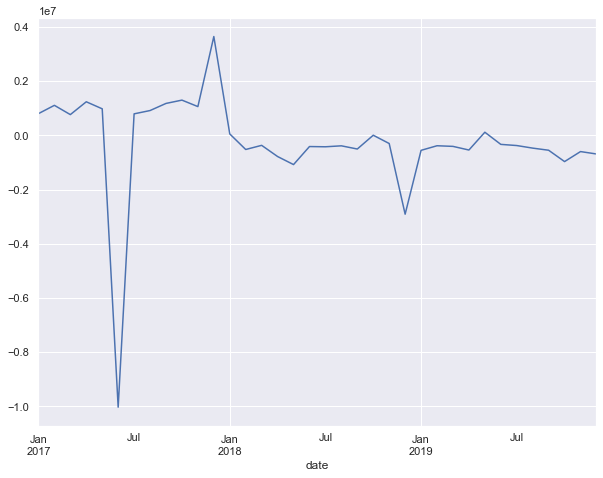

In [89]:
domestic_df["visitors"].diff(12)[12:].plot() #seasonality is removed by taking first seasonal difference(D=1)

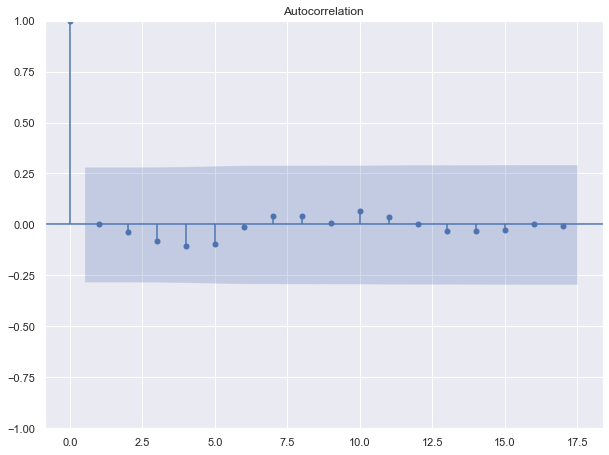

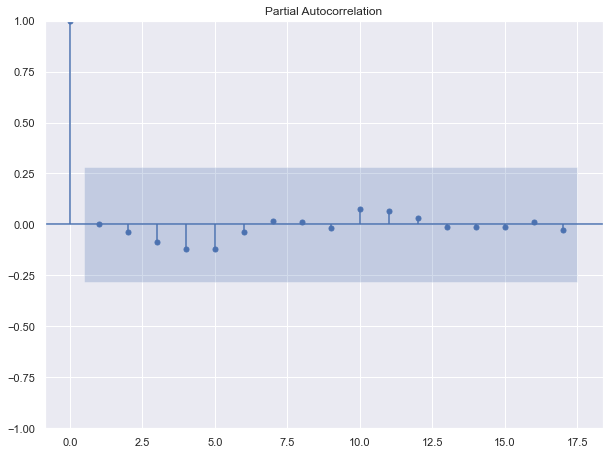

In [90]:
#plotting the acf and pacf to see if we can derive an order
plot_acf(domestic_df["visitors"]);
plot_pacf(domestic_df["visitors"]);

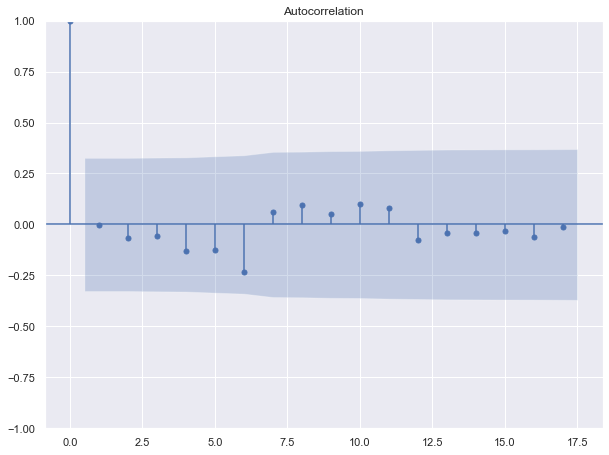

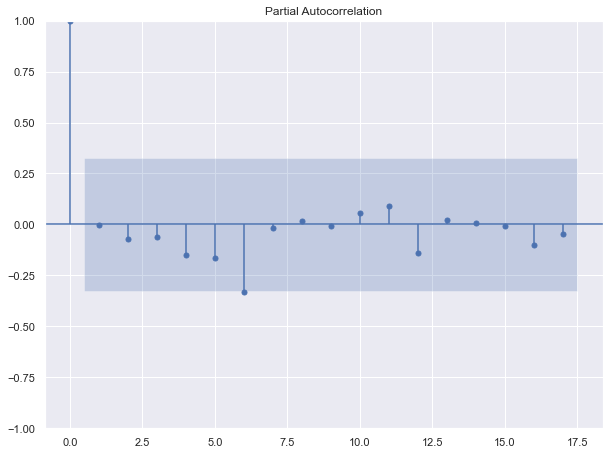

In [91]:
#plotting the acf and pacf to see if we can derive an order
plot_acf(domestic_df["visitors"].diff(12)[12:],lags=17);
plot_pacf(domestic_df["visitors"].diff(12)[12:],lags=17);

In [92]:
result_df = optimize_SARIMA(domestic_df["visitors"], parameters_list, 0, 1, s) #finding best hyperparameters for our model
result_df

  0%|          | 0/256 [00:00<?, ?it/s]

,"(p,q)x(P,Q)",AIC
0,"(2, 3, 3, 0)",1116.832033
1,"(2, 3, 3, 1)",1118.648544
2,"(1, 3, 3, 0)",1119.516728
3,"(2, 2, 3, 0)",1120.295848
4,"(0, 3, 3, 0)",1120.713782
...,...,...
251,"(3, 3, 0, 0)",1243.115043
252,"(2, 3, 0, 0)",1268.817113
253,"(1, 3, 0, 0)",1284.313425
254,"(0, 3, 0, 0)",1311.073121


In [93]:
#lowest AIC is achieved by p=2, q=3, P=3, Q=0 hence we will use these parameters

In [94]:
best_model_domestic= SARIMAX(domestic_df["visitors"], order= (2,0,3), seasonal_order=(3,1,0,12), simple_differencing=False)
result_domestic= best_model_domestic.fit(disp=False)
result_domestic.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            visitors   No. Observations:                   48
Model:             SARIMAX(2, 0, 3)x(3, 1, [], 12)   Log Likelihood                -549.416
Date:                             Wed, 10 May 2023   AIC                           1116.832
Time:                                     21:49:14   BIC                           1131.084
Sample:                                 01-01-2016   HQIC                          1121.806
                                      - 12-01-2019                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1710      0.283      0.603      0.546      -0.385       0.727
ar.L2          0.8228      0.280      2.934      0.003       0.273       1.373
ma.L1          0.0655      1.009      0.065      0.948      -1.913       2.044
ma.L2         -0.9076      0.763     -1.190      0.234      -2.402       0.587
ma.L3         -0.0075      0.308     -0.024      0.981      -0.611       0.596
ar.S.L12      -0.9274      0.150     -6.164      0.000      -1.222      -0.633
ar.S.L24      -0.9050      0.162     -5.602      0.000      -1.222      -0.588
ar.S.L36      -0.8653      0.101     -8.541      0.000      -1.064      -0.667
sigma2      5.096e+11   4.34e-12   1.17e+23      0.000     5.1e+11     5.1e+11
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):               105.39
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):               0.04   Skew:                            -1.79
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number  1e+40. Standard errors may be unstable.
"""

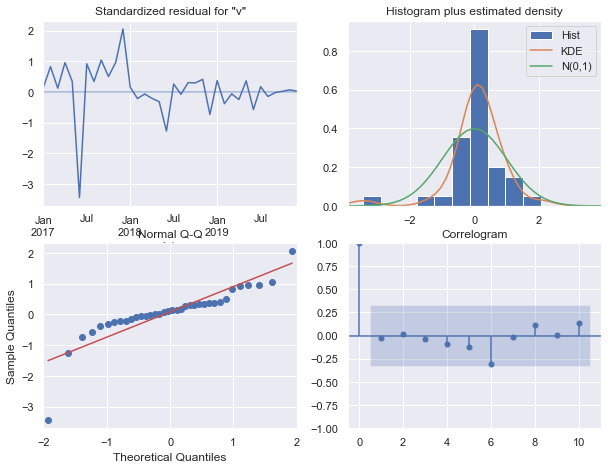

In [95]:
result_domestic.plot_diagnostics(); #checking the residuals of our model

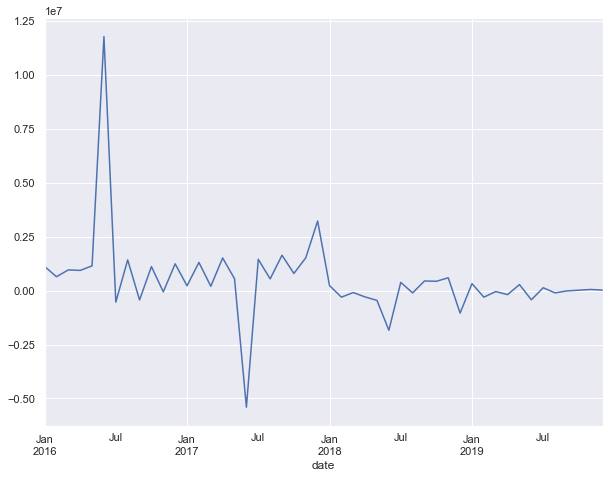

In [96]:
residuals= result_domestic.resid
residuals.plot();

In [98]:
yhat_domestic= result_domestic.predict()

In [99]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse= sqrt(mean_squared_error(domestic_df["visitors"][1:],yhat_domestic[1:]))
print(rmse) #root mean squared error

2094339.40062845


In [100]:
yhat_domestic[1:].sum()

59254398.04890293

In [101]:
domestic_df["visitors"][1:].sum()

82778450

In [102]:
# Let us forecast domestic visitors
predict_domestic = result_domestic.forecast(72)

In [103]:
predict_domestic= predict_domestic.round().astype("int").to_frame(name= "visitors")

In [104]:
all_domestic_df= pd.concat([domestic_df, predict_domestic])

In [105]:
all_domestic_df

,visitors
2016-01-01,1122510
2016-02-01,778748
2016-03-01,1017794
2016-04-01,1127738
2016-05-01,1287181
...,...
2025-08-01,3459052
2025-09-01,3433990
2025-10-01,3653166
2025-11-01,3420233


In [ ]:
#all_domestic_df.to_csv("Domestic_visitor_prediciton.csv")

In [106]:
domestic_visitor_2025= all_domestic_df[-12:]

In [107]:
domestic_visitor_2025.sum() #Sum of total estimated Domestic visitors for 2025

visitors    45417421
dtype: int64

<AxesSubplot:>

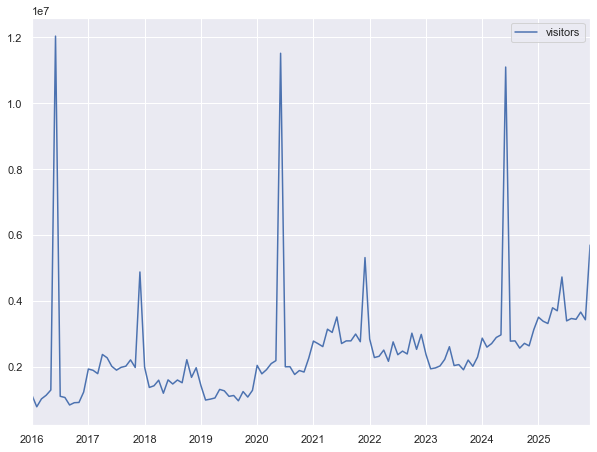

In [108]:
all_domestic_df.plot()

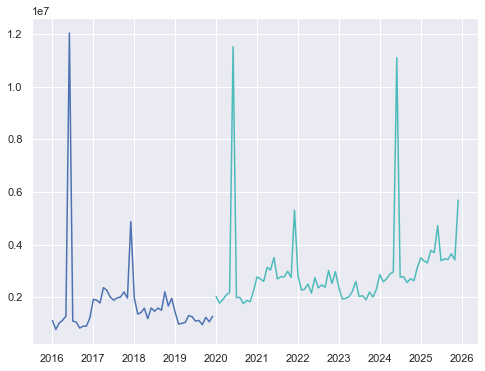

In [109]:
fig, ax = plt.subplots(figsize=(8,6))
sns.set_theme(style="darkgrid")
plt.plot(domestic_df['visitors'])
plt.plot(predict_domestic['visitors'],color='#4DBBBB')

In [111]:
#Sum of all visitors for Hyderabad for 2025
Forecasting_2025 = foreign_visitor_2025.sum() + domestic_visitor_2025.sum()
Forecasting_2025

visitors    46203144
dtype: int64